# Racetrack Data
We will be using racetrack data provided by the Technical University of Munich (https://github.com/TUMFTM/racetrack-database) which contains track data for F1, DTM, and IndyCar.

The data is stored in .csv form and has the following format: [x_m, y_m, w_tr_right_m, w_tr_left_m] </br>
*x_m* and *y_m* refer to the center line (x, y) </br>
*w_tr_right_m* and *w_tr_left_m* refer to the track widths to the right and left

This is an issue because our model requires the co-ordinates of the inner and outer boundaries of the track. </br>
We utilized the calc_splines() function from the many helper functions also provided by TUM (https://github.com/TUMFTM/trajectory_planning_helpers/blob/master/trajectory_planning_helpers/calc_splines.py).</br>
And the math from a laptime simulation done by TUM (https://github.com/TUMFTM/laptime-simulation/blob/master/opt_raceline/src/plot_track.py) to calculate outer/inner points and to plot the track.

With the parsing done, we have the data we need for our model. </br>
Below are the plots for 2 F1 tracks: Austin and Budapest.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from calc_splines import calc_splines
import math

def calc_normal_vectors(track_imp_cl):
    el_lengths_imp_cl = np.sqrt(np.sum(np.power(np.diff(track_imp_cl[:, :2], axis=0), 2), axis=1))
    normvecs_normalized_imp = calc_splines(path=track_imp_cl[:, :2],
                                           el_lengths=el_lengths_imp_cl,
                                           use_dist_scaling=True)[3]
    normvecs_normalized_imp_cl = np.vstack((normvecs_normalized_imp, normvecs_normalized_imp[0]))
    return normvecs_normalized_imp_cl

def calc_outer_points(track_imp_cl, normvecs_normalized_imp_cl):
    return track_imp_cl[:, :2] + normvecs_normalized_imp_cl * np.expand_dims(track_imp_cl[:, 2], 1)

def calc_inner_points(track_imp_cl, normvecs_normalized_imp_cl):
    return track_imp_cl[:, :2] - normvecs_normalized_imp_cl * np.expand_dims(track_imp_cl[:, 3], 1)

def plot_track(outer_points, inner_points):
    fig = plt.figure(figsize=(12.0, 8.0))
    track = fig.add_subplot(111)

    track.plot(outer_points[:, 0], outer_points[:, 1], 'g-')
    track.plot(inner_points[:, 0], inner_points[:, 1], 'g-')

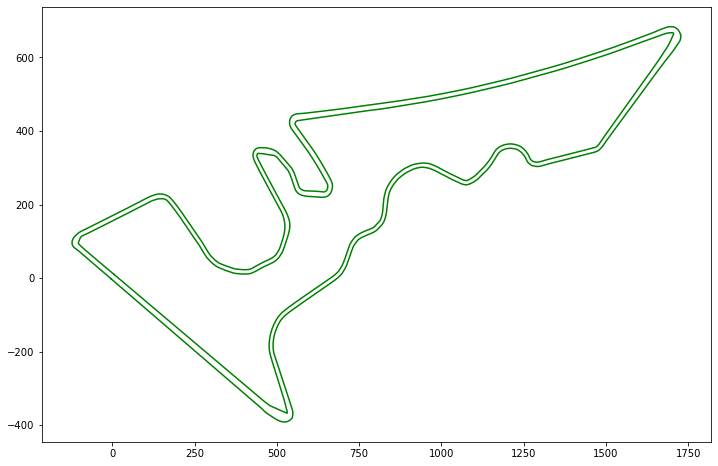

In [138]:
data = np.genfromtxt('Austin.csv',delimiter=',')

track_imp_cl = np.vstack((data, data[0]))
normvecs_normalized_imp_cl = calc_norm_vec(track_imp_cl)

outer_points = calc_outer_points(track_imp_cl, normvecs_normalized_imp_cl)
inner_points = calc_inner_points(track_imp_cl, normvecs_normalized_imp_cl)

plot_track(outer_points, inner_points)

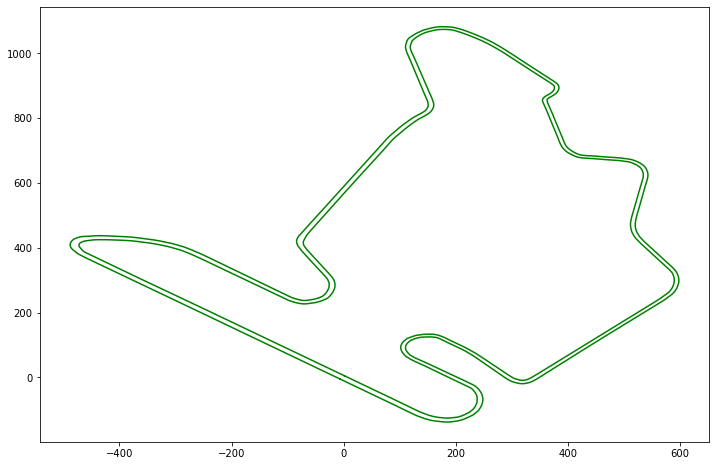

In [139]:
data = np.genfromtxt('Budapest.csv',delimiter=',')

track_imp_cl = np.vstack((data, data[0]))
normvecs_normalized_imp_cl = calc_norm_vec(track_imp_cl)

outer_points = calc_outer_points(track_imp_cl, normvecs_normalized_imp_cl)
inner_points = calc_inner_points(track_imp_cl, normvecs_normalized_imp_cl)

plot_track(outer_points, inner_points)